# Files

/content/drive/My Drive/Colab Notebooks/QuarentenaDados/Aula1/movies.csv

/content/drive/My Drive/Colab Notebooks/QuarentenaDados/Aula1/ratings.csv


In [0]:
import pandas as pd

In [104]:
movies = pd.read_csv('/content/drive/My Drive/Colab Notebooks/QuarentenaDados/Aula1/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [105]:
ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/QuarentenaDados/Aula1/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [106]:
movies.sample(3)

,movieId,title,genres
2850,3812,Everything You Always Wanted to Know About Sex...,Comedy
4203,6067,Ordinary Decent Criminal (2000),Comedy|Crime
3936,5537,Satin Rouge (2002),Drama|Musical


In [107]:
print(ratings.shape)

print(len(ratings))

(100836, 4)
100836


In [108]:
rating_movie_1 = ratings.query('movieId==1')
rating_movie_1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [109]:
rating_movie_1.describe()

,userId,movieId,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [110]:
rating_movie_1.mean()

userId       3.065302e+02
movieId      1.000000e+00
rating       3.920930e+00
timestamp    1.129835e+09
dtype: float64

In [111]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [112]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [113]:
ratings['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [114]:
ratings['rating'].mean()

3.501556983616962

In [115]:
rating_movie_1['rating'].mean()

3.9209302325581397

In [116]:
ratings_mean_bymovie = ratings.groupby('movieId')['rating'].mean()
ratings_mean_bymovie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [117]:
ratings_mean_bymovie

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [118]:
# movies['mean_rating'] = ratings_mean_bymovie
movies_with_rating = movies.join(ratings_mean_bymovie, on='movieId')
movies_with_rating

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [119]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [120]:
movies_with_rating.sort_values('rating', ascending=False).head(15)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


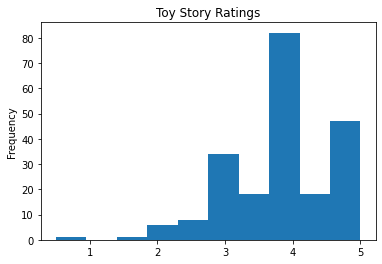

In [121]:
ratings.query('movieId == 1')['rating'].plot(kind='hist', title='Toy Story Ratings')

In [0]:
import matplotlib.pyplot as plt

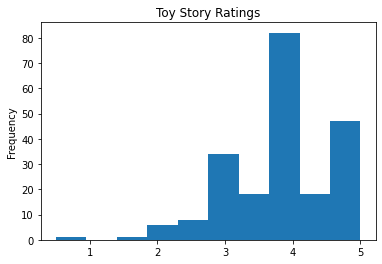

In [123]:
ratings.query('movieId == 1')['rating'].plot(kind='hist')
plt.title('Toy Story Ratings')
plt.show()

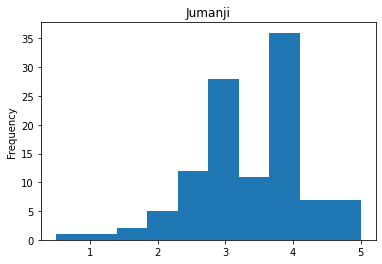

In [124]:
ratings.query('movieId == 2')['rating'].plot(kind='hist', title='Jumanji')

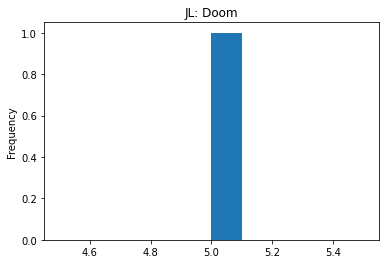

In [125]:
ratings.query('movieId == 102084')['rating'].plot(kind='hist', title='JL: Doom')

# .Desafios

## .Desafio 1
- Quantos filmes não possuem nenhuma avaliação?

In [127]:
selection = movies_with_rating['rating'].isnull()
movies_with_rating[selection]

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## .Desafio 2

- Mude o nome da coluna **nome** do dataframe **filmes_com_media** para **nota_media** após o join.

In [128]:
movies_with_rating = movies_with_rating.rename(columns={'rating': 'mean_rating'})
movies_with_rating.head(15)

,movieId,title,genres,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


## .Desafio 3

- Coloque o número de avaliações por filme, isto é, o total de votos por filme.

In [130]:
total_votes_bymovie = ratings.groupby('movieId')['rating'].count()
total_votes_bymovie.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [133]:
movies_with_rating_and_votes = movies_with_rating.join(total_votes_bymovie, on='movieId')
movies_with_rating_and_votes = movies_with_rating_and_votes.rename(columns={'rating': 'total_votes'})
movies_with_rating_and_votes.head(15)

,movieId,title,genres,mean_rating,total_votes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8.0
8,9,Sudden Death (1995),Action,3.125000,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0


## .Desafio 4

- Arredonde as médias(coluna de nota média) para duas casas decmais

In [135]:
movies_with_rating_and_votes['mean_rating'] = movies_with_rating_and_votes['mean_rating'].round(2)
movies_with_rating_and_votes.head(15)

,movieId,title,genres,mean_rating,total_votes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
5,6,Heat (1995),Action|Crime|Thriller,3.95,102.0
6,7,Sabrina (1995),Comedy|Romance,3.19,54.0
7,8,Tom and Huck (1995),Adventure|Children,2.88,8.0
8,9,Sudden Death (1995),Action,3.12,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.50,132.0


## .Desafio 5

- Descubra os gêneros dos filmes

In [140]:
genres = movies_with_rating_and_votes.genres.str.get_dummies('|')
genres = genres.columns.to_list()
genres

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## .Desafio 6

- Conte o número de aparições de cada gênero

In [138]:
total_votes_bygenres = movies_with_rating_and_votes.genres.str.get_dummies().sum()
total_votes_bygenres

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## .Desafio 7

- Plote um gráfico de aparições de cada gênero. (gráfico de barra)

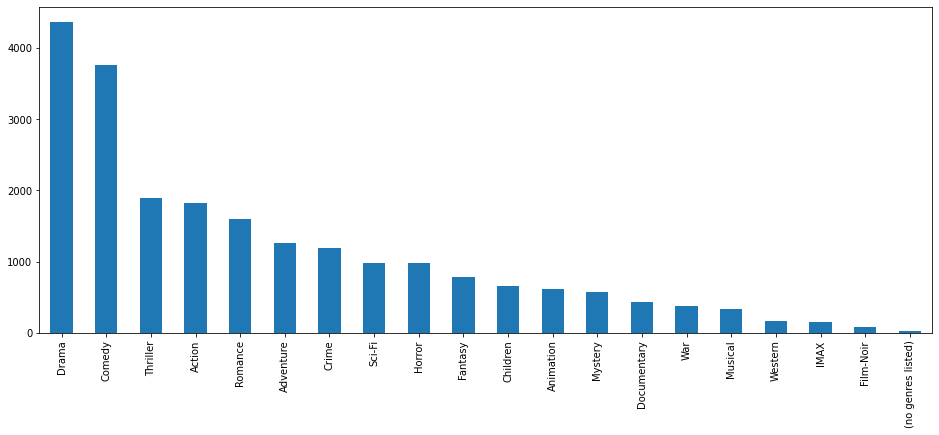

In [143]:
total_votes_bygenres.sort_values(ascending=False).plot(kind='bar', figsize=(16,6))